<a href="https://colab.research.google.com/github/bunnynoddy14/Lead_score/blob/main/Lead_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lead Scoring Case Study

## Problem Statement
### The education company, X Education, wants to identify the most potential leads so that their Sales team can focus more on communicating with these potential leads in order to successfully convert them.

### Importing libraries

In [947]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

## Reading the Data and Understanding Data

In [948]:
df = pd.read_csv('/content/Leads.csv')

In [949]:
## Reading heads of Data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [950]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [951]:
## checking the shape of data and info
df.shape

(9240, 37)

In [952]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [953]:
## Checking null values in data
df.isnull().sum().sort_values(ascending=False)

,0
Lead Quality,4767
Asymmetrique Activity Index,4218
Asymmetrique Profile Score,4218
Asymmetrique Activity Score,4218
Asymmetrique Profile Index,4218
Tags,3353
Lead Profile,2709
What matters most to you in choosing a course,2709
What is your current occupation,2690
Country,2461


In [954]:
# Drop all the columns in which greater than 3000 missing values are present
for col in df.columns:
    if df[col].isnull().sum() > 3000:
        df.drop(col, axis=1, inplace=True)


In [955]:
df.shape

(9240, 31)

In [956]:
## checking null value % for each columns
df.isnull().sum()/df.shape[0]*100

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


In [957]:
## Most of the columns contains "Select" which is nothing but the data not provided and can be counted as Null value
## Checking those value from each columns
for col in df.columns:
    print(df[col].astype('category').value_counts())
    print("********************************")

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
********************************
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
********************************
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
********************************
Lead 

In [958]:
## Lead profile, Specialisation and How did you hear about X Education seems very less realted data hence can be dropped
df.drop(['Lead Profile','Specialization','How did you hear about X Education'],axis=1,inplace=True)

In [959]:
df.isnull().sum()/df.shape[0]*100

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


In [960]:
## Checking Lead quality columns info
df.shape

(9240, 28)

### Few columns we observed that they have same values in all as No or Do Not Call. so it is better to drop them as well.

In [961]:
# Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points.Let's drop them as well.
df1 = df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content', 'Get updates on DM Content',
 'I agree to pay the amount through cheque'], axis=1, inplace=True)


In [962]:
## Checking null values in current data set again
df.isnull().sum().sort_values(ascending=False)

,0
What matters most to you in choosing a course,2709
What is your current occupation,2690
Country,2461
City,1420
TotalVisits,137
Page Views Per Visit,137
Last Activity,103
Lead Source,36
Prospect ID,0
Lead Number,0


In [963]:
## checking th value in What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts()

,count
What matters most to you in choosing a course,
Better Career Prospects,6528
Flexibility & Convenience,2
Other,1


In [964]:
## Dropping What matters most to you in choosing a course	since it has mostly the same value in all the columns
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [965]:
df.isnull().sum().sort_values(ascending=False)

,0
What is your current occupation,2690
Country,2461
City,1420
TotalVisits,137
Page Views Per Visit,137
Last Activity,103
Lead Source,36
Prospect ID,0
Lead Number,0
Lead Origin,0


In [966]:
## In City Null value to be replaced with "Not provided"
df['City'].fillna('Not provided', inplace=True)

In [967]:
df['Country'].fillna('Not provided', inplace=True)

In [968]:
df['What is your current occupation'].fillna('Not provided', inplace=True)

In [969]:
## Checking the value in What is your current occupation
df['What is your current occupation'].value_counts()

,count
What is your current occupation,
Unemployed,5600
Not provided,2690
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


### We will no drop this column as it may contain useful variables for coefficient and correlations but we can drop the null value present in all the available columns

In [970]:
df.shape

(9240, 15)

In [971]:
## we can drop the null value present in all the available columns
df = df[~pd.isnull(df['What is your current occupation'])]

In [972]:
df.shape

(9240, 15)

In [973]:
## Removing same null value from the rows of "Country", "City", "TotalVisits", "Page Views Per Visit", 	"Last Activity" & "Lead Source"
df = df[~pd.isnull(df['Country'])]

In [974]:
df.shape

(9240, 15)

In [975]:
df = df[~pd.isnull(df['TotalVisits'])]
df = df[~pd.isnull(df['Page Views Per Visit'])]
df = df[~pd.isnull(df['Last Activity'])]
df = df[~pd.isnull(df['Lead Source'])]

In [976]:
df.shape

(9074, 15)

In [977]:
df.isnull().sum().sort_values(ascending=False)

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0


In [978]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Mumbai,No,Modified


In [979]:
## Furthermore as columns Prospect ID	Lead Number does not provide any help in creating useful insights, better to drop them
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [980]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Mumbai,No,Modified


In [981]:
## checking City values
df.City.value_counts()

,count
City,
Mumbai,3177
Select,2156
Not provided,1419
Thane & Outskirts,745
Other Cities,680
Other Cities of Maharashtra,446
Other Metro Cities,377
Tier II Cities,74


In [982]:
## In City replacing "Select" as "Not Provided"
df.City.replace('Select', 'Not Provided', inplace=True)
## Combining "Other cities" and "Other cities of Maharashtra" into "Other Cities"
df.City.replace({'Other Cities of Maharashtra':'Other Cities'}, inplace=True)
df.City.replace({'Thane & Outskirts':'Thane'}, inplace=True)

In [983]:
df.City.value_counts()

,count
City,
Mumbai,3177
Not Provided,2156
Not provided,1419
Other Cities,1126
Thane,745
Other Metro Cities,377
Tier II Cities,74


In [984]:
df.City.value_counts()

,count
City,
Mumbai,3177
Not Provided,2156
Not provided,1419
Other Cities,1126
Thane,745
Other Metro Cities,377
Tier II Cities,74


In [985]:
##Checking value count of Last Notable Activity variable
df['Last Notable Activity'].value_counts()

,count
Last Notable Activity,
Modified,3267
Email Opened,2823
SMS Sent,2152
Page Visited on Website,318
Olark Chat Conversation,183
Email Link Clicked,173
Email Bounced,60
Unsubscribed,45
Unreachable,32


In [986]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,Not Provided,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Not Provided,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Mumbai,No,Modified


In [987]:
## Checking value count of Country
df.Country.value_counts()

,count
Country,
India,6491
Not provided,2296
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10


In [988]:
## Drop country as well since it has all India almost
df.drop('Country', axis=1, inplace=True)

In [989]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Creating dummy variables

In [990]:
## creating dummy variables for categorical columns
dummy = pd.get_dummies(df[['Lead Origin', 'City', 'Lead Source', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True, dtype=int)



In [991]:
## concating them to master file
df = pd.concat([df, dummy], axis=1)

In [992]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,City,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Not Provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Not Provided,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Mumbai,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,Mumbai,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Mumbai,...,0,0,1,0,0,0,0,0,0,0


In [993]:
## Dropping all the dummy variable which is created
df.drop(['Lead Origin', 'Lead Source', 'City', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity'], axis=1, inplace=True)


In [994]:
## renaming column "do not email" as "Contact Via Email"
df = df.rename(columns={'Do Not Email': 'Contact Via Email'})
df.head()

,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Not Provided,City_Not provided,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,No,0,0.0,0,0.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,No,0,5.0,674,2.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,No,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,No,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [995]:
def binary_map(x):
  return x.map({'Yes': 0, 'No': 1})

In [996]:
df[['Contact Via Email']] = df[['Contact Via Email']].apply(binary_map)

In [997]:
df.head()

,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Not Provided,City_Not provided,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0,0.0,0,0.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,5.0,674,2.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [998]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Contact Via Email                                     9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   Lead Origin_Landing Page Submission                   9074 non-null   int64  
 6   Lead Origin_Lead Add Form                             9074 non-null   int64  
 7   Lead Origin_Lead Import                               9074 non-null   int64  
 8   City_Not Provided                                     9074 non-

In [999]:
df_temp = df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
df_temp.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


<Axes: ylabel='TotalVisits'>

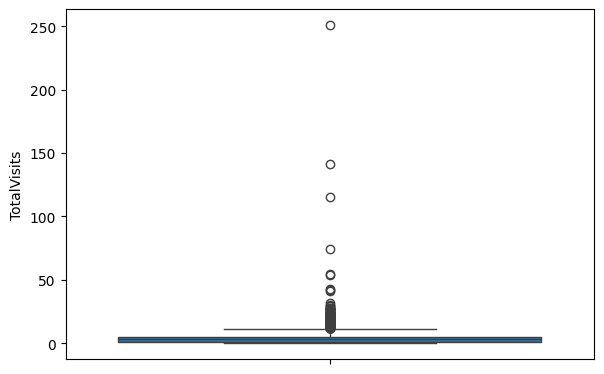

In [1000]:
## checking outlier in TotalVisits columns with boxplot
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(df['TotalVisits'])

In [1001]:
## Removing outlier from Totalvisits columns
Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.99)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['TotalVisits'] >= lower_bound) & (df['TotalVisits'] <= upper_bound)]


In [1002]:
df.head()

,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Not Provided,City_Not provided,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0,0.0,0,0.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,5.0,674,2.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1003]:
df.shape

(9066, 72)

### Taking Train Test Split

In [1004]:
from sklearn.model_selection import train_test_split

In [1005]:
## Dropping target variable converted column and savng intonew variable called X
X = df.drop('Converted', axis=1)

In [1006]:
y = df['Converted']

In [1007]:
X.head()

,Contact Via Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Not Provided,City_Not provided,City_Other Cities,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0.0,0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,5.0,674,2.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1008]:
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [1009]:
## Splitting into 70% train data and 30% split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1010]:
## Further scalling to the numeric numericals present in the data set
from sklearn.preprocessing import MinMaxScaler

In [1011]:
## Scaling numeric variables in data set
scaler = MinMaxScaler()

In [1012]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Contact Via Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Not Provided,City_Not provided,City_Other Cities,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6870,1,0.195122,0.121919,0.111250,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3592,1,0.097561,0.100792,0.055417,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3388,1,0.048780,0.779049,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1845,1,0.073171,0.211708,0.125000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5481,1,0.024390,0.159771,0.041667,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1013]:
## looking at the correlation of the dataset now
df.select_dtypes(include=[float, int]).corr()


,Contact Via Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Not Provided,City_Not provided,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Contact Via Email,1.000000,0.139823,-0.008712,0.047184,-0.024442,-0.098361,0.031102,0.016809,0.051157,0.016131,...,0.003064,0.011472,-0.123028,0.012696,-0.045717,0.003064,0.028637,0.010444,-0.242113,0.003064
Converted,0.139823,1.000000,0.048568,0.359881,0.003546,-0.037080,0.300761,-0.009358,0.111282,-0.239992,...,-0.008201,0.044573,-0.263706,-0.071654,-0.033497,0.013451,0.360403,0.037878,-0.016323,-0.008201
TotalVisits,-0.008712,0.048568,1.000000,0.309902,0.673589,0.386452,-0.232527,-0.051806,-0.241304,-0.226577,...,-0.004175,0.032329,-0.139890,-0.050017,0.227406,-0.010254,0.007233,0.009174,0.005990,0.014062
Total Time Spent on Website,0.047184,0.359881,0.309902,1.000000,0.330175,0.292590,-0.188548,-0.050749,-0.164176,-0.211571,...,-0.003771,0.022943,-0.127152,-0.050866,0.028647,-0.009299,0.137012,0.009611,0.003968,-0.007585
Page Views Per Visit,-0.024442,0.003546,0.673589,0.330175,1.000000,0.498213,-0.277159,-0.057881,-0.275375,-0.277743,...,-0.001821,0.014596,-0.102930,-0.091245,0.022425,-0.011894,0.063641,0.020366,0.022747,0.001553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,0.003064,0.013451,-0.010254,-0.009299,-0.011894,-0.011333,-0.002748,-0.000605,-0.005867,0.024382,...,-0.000110,-0.000413,-0.007880,-0.001508,-0.001989,1.000000,-0.005858,-0.000625,-0.000742,-0.000110
Last Notable Activity_SMS Sent,0.028637,0.360403,0.007233,0.137012,0.063641,0.052987,0.115562,-0.027621,0.098338,-0.158902,...,-0.005858,-0.021934,-0.418422,-0.080052,-0.105642,-0.005858,1.000000,-0.033194,-0.039392,-0.005858
Last Notable Activity_Unreachable,0.010444,0.037878,0.009174,0.009611,0.020366,-0.000799,0.007209,-0.003429,-0.011402,-0.010282,...,-0.000625,-0.002341,-0.044650,-0.008542,-0.011273,-0.000625,-0.033194,1.000000,-0.004204,-0.000625
Last Notable Activity_Unsubscribed,-0.242113,-0.016323,0.005990,0.003968,0.022747,0.018236,-0.018482,-0.004070,-0.021019,0.004132,...,-0.000742,-0.002778,-0.052987,-0.010137,-0.013378,-0.000742,-0.039392,-0.004204,1.000000,-0.000742
